In [22]:
import matplotlib.pyplot as plt
import seaborn
import pickle
from collections import defaultdict
import pandas as pd

In [30]:
COLORS = {}
COLORS["MSCN"] = "#4260f5"
COLORS["MSCN (Ours)"] = "Green"

In [8]:
with open("dropout-attrs.pkl", "rb") as f:
    xlabels_drop, attrs_drop = pickle.load(f)

In [7]:
with open("default-attrs.pkl", "rb") as f:
    xlabels_default, attrs_default = pickle.load(f)

In [9]:
import seaborn as sns

# def plot_attrs(xlabels, attrs, ax=None):
#     if ax is None:
#         plt.figure(figsize=(20, 20))
#         ax = plt.axes()

#     #plt.yticks(fontsize=20)
#     sns.barplot(x=attrs, y=xlabels, color='#4260f5', orient="horizontal", ax=ax, ci=None)

In [50]:
cdata = defaultdict(list)
for xi in range(len(xlabels_drop)):
    cdata["Feature"].append(xlabels_drop[xi])
    cdata["Attribute Importance"].append(attrs_drop[xi])
    cdata["Model"].append("MSCN (Ours)")
    
    cdata["Feature"].append(xlabels_default[xi])
    cdata["Attribute Importance"].append(attrs_default[xi])
    cdata["Model"].append("MSCN")
    
cdf = pd.DataFrame(cdata)

In [51]:
#cdf["Feature"] = cdf.apply(lambda x: x["Feature"].replace(",", ",\n") ,axis=1)

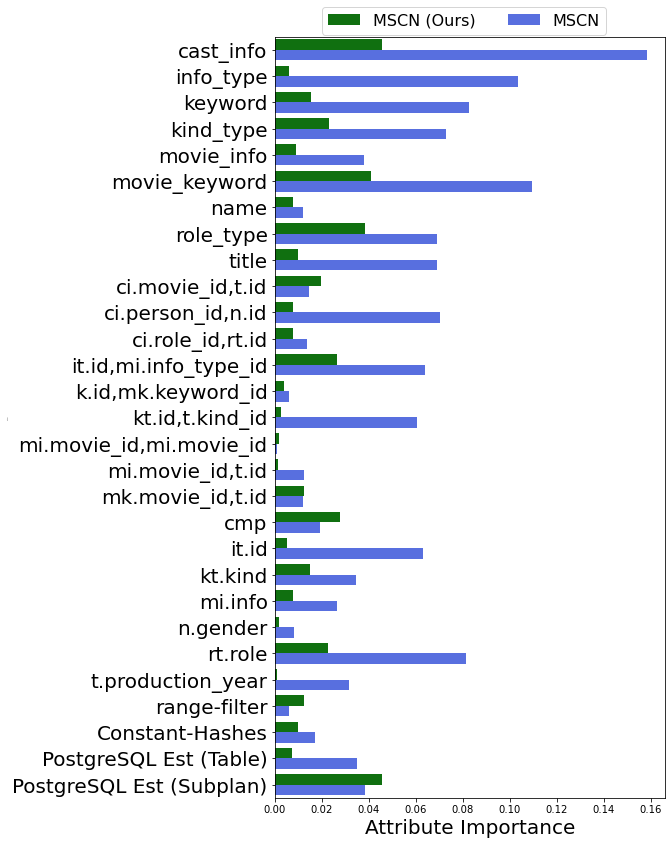

In [53]:
plt.figure(figsize=(7, 14))
ax = plt.axes()

#'#4260f5'

sns.barplot(data=cdf, x="Attribute Importance", y="Feature", hue="Model",
            palette = COLORS,
            orient="horizontal", ax=ax, ci=None)

plt.yticks(fontsize=20)
ax.set_ylabel("Features", fontsize=0)
ax.set_xlabel("Attribute Importance", fontsize=20)

legend = ax.legend(loc='upper left', bbox_to_anchor=(0.1,1.05), ncol=2,
                  prop={'size': 16})

plt.savefig("combined-attribute-figure.pdf", bbox_inches="tight")
plt.show()
